# Fundamentals of Data Analysis 2021
---
### Sam Tracey
### December 2021
### Analysis of Level 8 CAO points 2019 / 2020 / 2021
---

In [1]:
# Import Necessary Python Libraries.

# Regular Expressions
import re
# Convenient HTTP Requests
import requests as rq
import csv
# Working with dataframes and data
import pandas as pd
# Efficient working with datetimes
import datetime as dt

import numpy as np
# Extracting.pdf tabular data from websites
import tabula


In [2]:
# Get The Current Date and Time
now = dt.datetime.now()

# Format as a string
nowstr =  now.strftime('%Y%m%d_%H%M%S')

<br>

# Import CAO 2021 Points from .php (Now Redundant)

Reference: http://www.cao.ie/index.php?page=points&p=2021

***

In [3]:
'''
# Retrieve CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')
'''

"\n# Retrieve CAO points URL.\nresp = rq.get('http://www2.cao.ie/points/l8.php')\n"

<br>

## Save Original CAO 2021 Data Set.

***


In [4]:
'''
# Create a File Path for the Original Data
path = 'data/cao2021_' + nowstr + '.html'

'''

"\n# Create a File Path for the Original Data\npath = 'data/cao2021_' + nowstr + '.html'\n\n"

In [5]:
'''
# Server is using the incorrect encoding, we need to fix it.
original_encoding = resp.encoding
# Change to CP1252
resp.encoding = 'cp1252'

'''

"\n# Server is using the incorrect encoding, we need to fix it.\noriginal_encoding = resp.encoding\n# Change to CP1252\nresp.encoding = 'cp1252'\n\n"

In [6]:
'''
# Save the Original html file
with open(path, 'w') as f:
    f.write(resp.text)
'''

"\n# Save the Original html file\nwith open(path, 'w') as f:\n    f.write(resp.text)\n"

<br>

## Use Regular Expressions to Select Correrct Lines

***

In [7]:
'''
# Compile Regular Expression for Matching Lines.
# Original Regular expression after week 4 videos
# re_course = re.compile('([A-Z]{2}[0-9]{3})  (.*?) (\#?|([0-9]{4}|[0-9]{3})|\*?)  (.*?)')
# Modified regular expression attempting to properly separate course details
# re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*?)([0-9]{3,5})(\*?) *')
# Third & successful version of Regular Expression as I was missing course with no points.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
'''

"\n# Compile Regular Expression for Matching Lines.\n# Original Regular expression after week 4 videos\n# re_course = re.compile('([A-Z]{2}[0-9]{3})  (.*?) (\\#?|([0-9]{4}|[0-9]{3})|\\*?)  (.*?)')\n# Modified regular expression attempting to properly separate course details\n# re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*?)([0-9]{3,5})(\\*?) *')\n# Third & successful version of Regular Expression as I was missing course with no points.\nre_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')\n"

<br>

## Loop Through the Lines of the Response and Write to .csv file

***
 

In [8]:
'''

# This was the code I originally worked on to use REGEX to extract the data.
# I really thought it was working only to realise that it ignored any courses with 
# no points allocated in either EOS or MID.


# Define path in which to save .csv file.
path = 'data/cao2021_csv_' + nowstr + '.csv'
# Open the csv file for writing in to.
with open(path,'w', encoding='utf-8') as file:
    # Loop through the lines of responses.
    for line in resp.iter_lines():
        # Match only the lines we want - those representing courses
        if re_course.fullmatch(line.decode('cp1252')):
            # Add comma delimiters after each grouping and decode line (using incorrect decoding!)
            csv_ver = re_course.sub(r'\1, \2, \3, \4', line.decode('cp1252'))
            csv_ver = ' '.join(csv_ver.split())
            csv_ver = re.sub('[#*]', '', csv_ver)
            file.write(csv_ver + '\n')
            
'''
            

"\n\n# This was the code I originally worked on to use REGEX to extract the data.\n# I really thought it was working only to realise that it ignored any courses with \n# no points allocated in either EOS or MID.\n\n\n# Define path in which to save .csv file.\npath = 'data/cao2021_csv_' + nowstr + '.csv'\n# Open the csv file for writing in to.\nwith open(path,'w', encoding='utf-8') as file:\n    # Loop through the lines of responses.\n    for line in resp.iter_lines():\n        # Match only the lines we want - those representing courses\n        if re_course.fullmatch(line.decode('cp1252')):\n            # Add comma delimiters after each grouping and decode line (using incorrect decoding!)\n            csv_ver = re_course.sub(r'\x01, \x02, \x03, \x04', line.decode('cp1252'))\n            csv_ver = ' '.join(csv_ver.split())\n            csv_ver = re.sub('[#*]', '', csv_ver)\n            file.write(csv_ver + '\n')\n            \n"

In [9]:
'''
# Noticed that my original code above was missing courses with no points

# Define path in which to save .csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'
# Open the csv file for writing in to.
with open(path2021,'w') as file:
    # Loop through the lines of responses.
    for line in resp.iter_lines():
        # Decode the line using cp1252
        dline = line.decode('cp1252')
        # Match only the lines we want - those representing courses
        if re_course.fullmatch(dline):
            # Define Course Code
            course_code = dline[:5]
            # Define Course Title
            course_title = dline[7:58]
            # Define first points
            points1 = dline[60:66]
            # Define second points
            points2 = dline[69:75]
            # Combine all string elements into full line with comma separation
            line_join = [course_code, course_title, points1, points2]
            # Use regex.sub to replace all # and * characters with ''
            line_join = [re.sub('[#*]', '', elem) for elem in line_join]
            # Write a comma separated line to file with new line after each write.
            file.write(','.join(line_join) + '\n')
            
'''

"\n# Noticed that my original code above was missing courses with no points\n\n# Define path in which to save .csv file.\npath2021 = 'data/cao2021_csv_' + nowstr + '.csv'\n# Open the csv file for writing in to.\nwith open(path2021,'w') as file:\n    # Loop through the lines of responses.\n    for line in resp.iter_lines():\n        # Decode the line using cp1252\n        dline = line.decode('cp1252')\n        # Match only the lines we want - those representing courses\n        if re_course.fullmatch(dline):\n            # Define Course Code\n            course_code = dline[:5]\n            # Define Course Title\n            course_title = dline[7:58]\n            # Define first points\n            points1 = dline[60:66]\n            # Define second points\n            points2 = dline[69:75]\n            # Combine all string elements into full line with comma separation\n            line_join = [course_code, course_title, points1, points2]\n            # Use regex.sub to replace all # a

In [10]:
'''
# Read 2021 csv to dataframe and add headers for each column
df2021 = pd.read_csv(path2021, names=['Code', 'Title', 'Points1', 'Points2'])
# Add a year column for later analysis
df2021['Year'] = 2021

'''

"\n# Read 2021 csv to dataframe and add headers for each column\ndf2021 = pd.read_csv(path2021, names=['Code', 'Title', 'Points1', 'Points2'])\n# Add a year column for later analysis\ndf2021['Year'] = 2021\n\n"

In [11]:
'''
# Have a peak at top and bottom rows of dataframe
df2021.head()
'''

'\n# Have a peak at top and bottom rows of dataframe\ndf2021.head()\n'

<br>

## Update - December 2021.

Towards the end of November 2021, the CAO website updated to provide a .xlsx download of the 2021 CAO points. Where the original .php line only showed Round 1 and Round 2 Points, the next .xlsx version provides a much more expansive dataset. Using this dataset would allow us to perform more interesting analysis, particularly of the Mid-point between 2019, 2020 and 2021.

The above section is commented out to show the work that had been done up to this point to extract and clean the .php version of the 2021 points. I have included the section below to access the nex 2021 .xlsx file.

<br>

# Import CAO 2021 Points from .xlsx

Reference: http://www2.cao.ie/points/CAOPointsCharts2021.xlsx

***

In [12]:
# Create a File Path for the Original Data
path2021 = 'data/cao2021_' + nowstr + '.csv'

In [13]:
# Define url to read data from
Cao2021_Url = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

In [14]:
# Save an original version of the 2021 CAO Excel File directly from URL
# reference https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file
resp = rq.get(Cao2021_Url)
output = open(path2021, 'wb')
with open(path2021, 'wb') as output:
    output.write(resp.content)

In [15]:
# Read 2021 CAO points from .xslx URL
df2021 = pd.read_excel(Cao2021_Url,
                   sheet_name='EOS_2021',
                   skiprows=range(11),
                   usecols = "A:O",
                   index_col=None)
# Add a year column for later analysis
df2021['Year'] = 2021

In [16]:
# Take a peak at top few rows.
df2021.head()

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v,Year
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN,2021


In [17]:
# Select only lvl 8 courses
df2021 = df2021[df2021['Course Level'] > 7]
# Have a peak at top rows of dataframe
df2021.head()


,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v,Year
29,Information and Communication Technologies (ICTs),Software Design for Virtual Reality and Gaming,AL801,300,NaN,NaN,NaN,300,NaN,359,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
30,Information and Communication Technologies (ICTs),Software Design in Artificial Intelligence for...,AL802,313,NaN,NaN,NaN,313,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
31,Information and Communication Technologies (ICTs),Software Design for Mobile Apps and Connected ...,AL803,350,NaN,NaN,NaN,350,NaN,398,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
32,Information and Communication Technologies (ICTs),Computer Engineering for Network Infrastructure,AL805,321,NaN,NaN,NaN,321,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
33,Architecture and construction,Quantity Surveying,AL810,328,NaN,NaN,NaN,328,NaN,377,8,Athlone Institute of Technology,NaN,NaN,NaN,2021


In [18]:
# Select only Columns of Interest
df2021 = df2021.loc[:, ['Course Code', 'Course Title', 'R1 Points', 'R2 Points ', 'EOS Midpoints', 'Year']]

# Remove all non-numeric characters that appeared in the Points columns
df2021['R1 Points'] = df2021['R1 Points'].replace('[a-z.#*+A-Z]', '',regex=True)
df2021['R2 Points '] = df2021['R2 Points '].replace('[a-z.#*+A-Z]', '',regex=True)
df2021['EOS Midpoints'] = df2021['EOS Midpoints'].replace('[a-z.#*+A-Z]', '',regex=True)

# Rename dataframe columns
df2021.columns = ['Code', 'Title', 'Points1', 'Points2', 'Mid-point', 'Year']

df2021

,Code,Title,Points1,Points2,Mid-point,Year
29,AL801,Software Design for Virtual Reality and Gaming,300,NaN,359,2021
30,AL802,Software Design in Artificial Intelligence for...,313,NaN,381,2021
31,AL803,Software Design for Mobile Apps and Connected ...,350,NaN,398,2021
32,AL805,Computer Engineering for Network Infrastructure,321,NaN,381,2021
33,AL810,Quantity Surveying,328,NaN,377,2021
...,...,...,...,...,...,...
1446,WD211,Creative Computing,270,NaN,392,2021
1447,WD212,Recreation and Sport Management,262,NaN,304,2021
1448,WD230,Mechanical and Manufacturing Engineering,230,230,361,2021
1449,WD231,Early Childhood Care and Education,266,NaN,366,2021


In [19]:
# Write dataframe to .csv file
df2021.to_csv(path2021, encoding='utf-8')

<br>

## Validation Of 2021 Data

***

To validate the data that the Python code extracted from the 2021 URL I downloaded the Excel file for all CAO points from the website. I manually removed the top 11 rows which contained information pertaining to the courses but no actual course data. I then used the filter on the LEVEL column to only show the level 8 courses.This left 1034 rows which matches the number of rows returned using the Python code above.

This text file has been saved here: [data/2021_Validation.xlsx](http://localhost:8888/doc/tree/data/2021_Validation.xlsx)

<br>

## Reading 2020 CAO Points From Messy Excel File


Reference: http://www.cao.ie/index.php?page=points&p=2020&bb=points
***

In [20]:
# Define Path for writing Data
path2020 = 'data/cao2020_csv_' + nowstr + '.csv'

In [21]:
# Define url to read data from
Cao2020_Url = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [22]:
# Save an original version of the 2020 CAO Excel File directly from URL
# reference https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file
resp = rq.get(Cao2020_Url)
output = open(path2020, 'wb')
with open(path2020, 'wb') as output:
    output.write(resp.content)

In [23]:
# Read 2020 CAO points from .xslx URL
df2020 = pd.read_excel(Cao2020_Url,
                   sheet_name='PointsCharts2020_V2',
                   skiprows=range(10),
                   usecols = "A:O",
                   index_col=None)
# Add a year column for later analysis
df2020['Year'] = 2020


In [24]:
# Select only lvl 8 courses
df2020 = df2020[df2020['LEVEL'] > 7]
# Have a peak at top and bottom rows of dataframe
df2020.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,LEVEL,HEI,Test/Interview #,avp,v,Year
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,8,American College,NaN,NaN,NaN,2020
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,8,American College,NaN,NaN,NaN,2020
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN,2020
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN,2020
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN,2020


In [25]:
# Select only Columns of Interest
df2020 = df2020.loc[:, ['COURSE CODE2', 'COURSE TITLE', 'R1 POINTS', 'R2 POINTS', 'EOS Mid-point', 'Year']]

# Remove all non-numeric characters that appeared in the Points columns
df2020['R1 POINTS'] = df2020['R1 POINTS'].replace('[a-z.#*+A-Z]', '',regex=True)
df2020['R2 POINTS'] = df2020['R2 POINTS'].replace('[a-z.#*+A-Z]', '',regex=True)
df2020['EOS Mid-point'] = df2020['EOS Mid-point'].replace('[a-z.#*+A-Z]', '',regex=True)

# Rename dataframe columns
df2020.columns = ['Code', 'Title', 'Points1', 'Points2', 'Mid-point', 'Year']

df2020.head()

,Code,Title,Points1,Points2,Mid-point,Year
0,AC120,International Business,209,NaN,280,2020
1,AC137,Liberal Arts,252,NaN,270,2020
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,NaN,,2020
3,AD102,Graphic Design and Moving Image Design (portfo...,,NaN,,2020
4,AD103,Textile & Surface Design and Jewellery & Objec...,,NaN,,2020


In [26]:
# Write dataframe to .csv file
df2020.to_csv(path2020, encoding='utf-8')

In [27]:
# Have a peak at top and bottom rows of dataframe
df2020


,Code,Title,Points1,Points2,Mid-point,Year
0,AC120,International Business,209,NaN,280,2020
1,AC137,Liberal Arts,252,NaN,270,2020
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,NaN,,2020
3,AD102,Graphic Design and Moving Image Design (portfo...,,NaN,,2020
4,AD103,Textile & Surface Design and Jewellery & Objec...,,NaN,,2020
...,...,...,...,...,...,...
1455,WD200,Arts (options),,,336,2020
1460,WD210,Software Systems Development,279,NaN,337,2020
1461,WD211,Creative Computing,271,NaN,318,2020
1462,WD212,Recreation and Sport Management,270,NaN,349,2020


In [28]:
# Spot check to ensure that dataframe row 540 matches Excel row 542 (Difference in 2 = Python Zero indexing and Excel Header)
df2020.iloc[540]

Code                                          LC294
Title        Business Studies with Event Management
Points1                                         279
Points2                                         NaN
Mid-point                                       347
Year                                           2020
Name: 759, dtype: object

<br>

## Validation 0f 2020 Data

***

To validate the data that the Python code extracted from the 2020 URL I downloaded the Excel file for all CAO points from the website. I manually removed the top 10 rows which contained information pertaining to the courses but no actual course data. I then used the filter on the LEVEL column to only show the level 8 courses.This left 1028 rows which matches the number of rows returned using the Python code above.

This text file has been saved [here](http://localhost:8888/doc/tree/data/2020_Validation.xlsx)





<br>

## Reading 2019 CAO Points From PDF File
Reference: http://www.cao.ie/index.php?page=points&p=2020

***



In [88]:
# Define path for writing 2019 csv file
path2019 = 'data/cao2019_csv_' + nowstr + '.csv'

In [89]:
# Define path for writing 2019 original pdf file
path_pdf = 'data/cao2019_pdf_' + nowstr + '.pdf'

In [90]:
# Define url link for 2019 CAO points
cao2019_url = 'http://www2.cao.ie/points/lvl8_19.pdf'

In [91]:
# Save an original version of the 2019 CAO pdf File directly from URL
# reference https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file
resp = rq.get(cao2019_url)
with open(path_pdf, 'wb') as output:
    output.write(resp.content)

In [92]:
# Read 2019 data in pdf format from url and convert to .csv file saving it in specified path
# reference: https://tabula-py.readthedocs.io/en/latest/getting_started.html
# tabula.convert_into(cao2019_url, path, output_format="csv", pages='all')

In [93]:
# read pdf from URL into a list class (pdf_list) then convert to dataframe
# reference: https://towardsdatascience.com/how-to-extract-tables-from-pdf-using-python-pandas-and-tabula-py-c65e43bd754
pdf_list = tabula.read_pdf(cao2019_url, lattice=True, pages='all',output_format='dataframe')
df2019=pdf_list[0]

In [94]:
# Drop # and * symbols from EOS and Mid columns
#['EOS'] =  df2019['EOS'].str.replace(r"[*#]",'')
#df2019['Mid'] =  df2019['Mid'].str.replace(r"[*#]",'')

df2019['EOS'] = df2019['EOS'].replace('[a-z.#*+A-Z]', '',regex=True)
df2019['Mid'] = df2019['Mid'].replace('[a-z.#*+A-Z]', '',regex=True)


In [95]:
# Dropping insitution header lines
# Reference: https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe
# Convert fields that are '' to Numpy NaN values in Course Code column
df2019['Course Code'].replace('', np.nan, inplace=True)
# Drop all lines where Course Code column contains a Nan
df2019.dropna(subset=['Course Code'], inplace=True)
df2019['Points2']= np.nan
# Add a year Column for later anaylsis
df2019.columns = ['Code', 'Title', 'Points1', 'Mid-point', 'Points2']




In [96]:
# Reorder columns to match other datasets
df2019 = df2019.reindex(columns = ['Code', 'Title', 'Points1', 'Points2', 'Mid-point'])
df2019['Year'] = 2019

In [97]:
# Have a peak at top and bottom rows of dataframe
df2019.head()

,Code,Title,Points1,Points2,Mid-point,Year
1,AL801,Software Design with Virtual Reality and Gaming,304,NaN,328,2019
2,AL802,Software Design with Cloud Computing,301,NaN,306,2019
3,AL803,Software Design with Mobile Apps and Connected...,309,NaN,337,2019
4,AL805,Network Management and Cloud Infrastructure,329,NaN,442,2019
5,AL810,Quantity Surveying,307,NaN,349,2019


In [79]:
# Write dataframe to .csv file
df2019.to_csv(path2019, encoding='utf-8', index=False)

<br>

## Validation of 2019 Data

***

To validate the data that the Python code extracted from the 2019 URL I manually downloaded the .pdf data from the website and used Adobe Acrobat Pro 2017 to export the .pdf file to an Excel file . I deleted the top 10 rows in the Excel file then applied a filter to the Course Code. I used the filter to remove all the blank cells in the Course Code column. This left me with a total of 931 rows which matches the number of rows produced using the Python code above. I then manually compared a small sample of the two files to ensure they matched.

This Excel file used for validation has been saved [here](http://localhost:8888/doc/tree/data/2019_Validation.xlsx)

***

<br>

## Concatenation of all dataframes

***

In [80]:
# Define Path for Saving Data
path_union = 'data/cao_union_csv_' + nowstr + '.csv'

In [81]:
# Concatenate all lvl 8 CAO points for years 2019, 2020 & 2021.
df_all = pd.concat([df2019, df2020, df2021])
# Sort concatenated dataframe on Code and look at top 50 rows.
df_all.sort_values(by=['Code'], inplace=True)
df_all.head(50)

,Code,Title,Points1,Mid,Year
174,AC120,International Business,234,269,2019
175,AC120,International Business ...,294,294,2021
0,AC120,International Business,209,280,2020
176,AC137,Liberal Arts ...,271,270,2021
175,AC137,Liberal Arts,252,275,2019
1,AC137,Liberal Arts,252,270,2020
431,AD101,First Year Art & Design (Common Entry),,550,2019
311,AD101,First Year Art and Design (Common Entry portfo...,554,NaN,2021
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,,2020
432,AD102,Graphic Design and Moving Image Design,,635,2019


In [82]:
# Write dataframe to .csv file
df_all.to_csv(path_union, encoding='utf-8', index=False)

<br>

The dataframe **df_all** is a union of 2019, 2020 and 2021 without removal of duplicates.

<br>

## Removing Duplicates and Joining Dataframes on Course Code.

In [83]:
# Define Path for Saving Data
path_join = 'data/cao_join_csv_' + nowstr + '.csv'

In [84]:
# Drop all duplicates from Dataframe based on the Code column.
df_join = df_all.drop_duplicates(subset=['Code'])
df_join

,Code,Title,Points1,Mid,Year
174,AC120,International Business,234,269,2019
176,AC137,Liberal Arts ...,271,270,2021
431,AD101,First Year Art & Design (Common Entry),,550,2019
432,AD102,Graphic Design and Moving Image Design,,635,2019
433,AD103,Textile & Surface Design and Jewellery & Objects,,545,2019
...,...,...,...,...,...
962,WD211,Creative Computing,275,322,2019
963,WD212,Recreation and Sport Management,274,311,2019
964,WD230,Mechanical and Manufacturing Engineering,273,348,2019
947,WD231,Early Childhood Care and Education ...,266,NaN,2021


<br>

The resulting dataframe has 1214 rows. We verified that this is correct by opening the df_all dataframe in Excel and using the Excel "Remove Duplicates" function on the Code column. The validation data set can be found [here](http://localhost:8888/doc/tree/data/Validate_drop_duplicates.csv)

In [85]:
# Drop Points1, Points2 and Year columns from df_join dataframe
df_join = df_join.drop(['Points1', 'Mid', 'Year'], axis=1)


In [87]:
# Create new dataframe for 2019 with only Code and Points columns.
df2019_points = df2019[['Code', 'Points1', 'Mid']].rename(columns={'Points1':'EOS_2019', 'Mid':'Mid_2019'})

In [88]:
# Create new dataframe for 20202 with only Code and Points columns.
df2020_points = df2020[['Code', 'Points1', 'Mid']].rename(columns={'Points1':'EOS_2020', 'Mid':'Mid_2020'})

In [95]:
# Create new dataframe for 2021 with only Code and Points columns.
df2021_points = df2021[['Code', 'Points1', 'Mid']].rename(columns={'Points1':'EOS_2021', 'Mid':'Mid_2021'})

In [96]:
# Use Pandas merge function to join all tables in one line of code.
""" I found this much more efficient than the method shown in the
    Joins in Panda video.
    Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns"""

df_merge = df_join.merge(df2019_points,
                         on='Code',
                         how='left').merge(df2020_points,
                                           on='Code',
                                           how='left').merge(df2021_points,
                                                             on='Code',
                                                             how='left')

In [98]:
# Have a look at the dataframe
df_merge

,Code,Title,EOS_2019,Mid_2019,EOS_2020,Mid_2020,EOS_2021,Mid_2021
0,AC120,International Business,234,269,209,280,294,294
1,AC137,Liberal Arts ...,252,275,252,270,271,270
2,AD101,First Year Art & Design (Common Entry),,550,,,554,NaN
3,AD102,Graphic Design and Moving Image Design,,635,,,538,NaN
4,AD103,Textile & Surface Design and Jewellery & Objects,,545,,,505,NaN
...,...,...,...,...,...,...,...,...
1209,WD211,Creative Computing,275,322,271,318,270,NaN
1210,WD212,Recreation and Sport Management,274,311,270,349,262,NaN
1211,WD230,Mechanical and Manufacturing Engineering,273,348,253,369,230,230
1212,WD231,Early Childhood Care and Education ...,NaN,NaN,NaN,NaN,266,NaN


In [42]:
# Replace all cells with white space with NaN values.
# Reference https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
df_merge.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [43]:
# Write dataframe to .csv file
df_merge.to_csv(path_join, encoding='utf-8', index=False)

In [44]:
# View data types of each column.
df_merge.dtypes


Code             object
Title            object
Points1_2019     object
Points2_2019     object
Points1_2020     object
Points2_2020    float64
Points1_2021     object
Points2_2021     object
dtype: object

In [45]:
# Convert points colums to numeric values.
# Reference: https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
for col in  df_merge.columns[2:]:
    df_merge[col] = pd.to_numeric(df_merge[col], errors='coerce')

In [46]:
# View data types after conversion.
df_merge.dtypes

Code             object
Title            object
Points1_2019    float64
Points2_2019    float64
Points1_2020    float64
Points2_2020    float64
Points1_2021    float64
Points2_2021    float64
dtype: object

In [47]:
# Check some statistical values for numeric columns.
df_merge.describe()

,Points1_2019,Points2_2019,Points1_2020,Points2_2020,Points1_2021,Points2_2021
count,905.000000,915.000000,993.000000,988.000000,923.000000,255.000000
mean,374.893923,426.414208,391.799597,448.198381,407.666306,414.749020
std,123.959108,133.142255,128.446837,129.237735,128.706224,141.693386
min,55.000000,57.000000,55.000000,57.000000,57.000000,60.000000
25%,290.000000,339.000000,300.000000,362.000000,303.000000,293.500000
50%,348.000000,397.000000,368.000000,426.500000,391.000000,424.000000
75%,440.000000,477.500000,474.000000,510.000000,499.000000,521.500000
max,979.000000,1073.000000,1088.000000,1088.000000,1028.000000,904.000000


<br>

***

The code below is how I initially joined all the dataframes together having worked through the video "Joins in Panda". I didn't like the repetitive nature of the code nor the constant issues with indexing. Therefore I used the pd.merge() function above which, to me, is cleaner and easier to understand.

***

In [48]:
# Create new dataframe for 2019 with only Code and Points columns.
# df2019_points = df2019[['Code', 'Points1', 'Points2']].rename(columns={'Points1':'Points1_2019', 'Points2':'Points2_2019'})
# Set the dataframe index to the Code column.
# df2019_points = df2019_points.set_index('Code')

In [49]:
# Perform left outer join of df20219_points on df_join by key = Code
# df_join = df_join.set_index('Code').join(df2019_points[['Points1_2019', 'Points2_2019']])

In [50]:
# Create new dataframe for 2020 with only Code and Points columns.
# df2020_points = df2020[['Code', 'Points1', 'Points2']].rename(columns={'Points1':'Points1_2020', 'Points2':'Points2_2020'})
# Set the dataframe index to the Code column.
# df2020_points = df2020_points.set_index('Code')


In [51]:
# Perform left outer join of df2020_points on df_join by key = Code
# df_join = df_join.join(df2020_points[['Points1_2020', 'Points2_2020']])

In [52]:
# Create new dataframe for 2021 with only Code and Points columns.
# df2021_points = df2021[['Code', 'Points1', 'Points2']].rename(columns={'Points1':'Points1_2021', 'Points2':'Points2_2021'})
# Set the dataframe index to the Code column.
# df2021_points = df2021_points.set_index('Code')

In [53]:
# Perform left outer join of df2021_points1 on df_join by key = Code
# df_join = df_join.join(df2021_points[['Points1_2021', 'Points2_2021']])

In [54]:
# Sort the dataframe vy Code and take a look
# df_join.sort_values(by = ['Code'], inplace=True)
# df_join

<br>

***

# Visualisations

***

In [55]:
# Import charting package
import matplotlib.pyplot as plt

# Change default style of matplot lib pyplot charts.
plt.style.use('seaborn')

# Change default matplotlib pyplot figure size and bins.
plt.rcParams['figure.figsize'] = (18,10)

""" Bin size was chosen using Rice's Rule:
# Rice’s Rule
# Rice’s rule is defined as: (cube root of the number of observations) * 2.
# For 993 observations, the Rice rule equals 20 (the cubed root of 993 is 10; 10 * 2 = 20).
# Reference: https://www.statisticshowto.com/choose-bin-sizes-statistics/ """

plt.rcParams["hist.bins"] = 20



## Histograms
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

***

In [56]:
# Create a numpy array for each year's round 1 points.
r1_2019 = df_merge['Points1_2019'].to_numpy()
r1_2020 = df_merge['Points1_2020'].to_numpy()
r1_2021 = df_merge['Points1_2021'].to_numpy()

# Calculate the median value for each year's round 1 points.
med_2019 = df_merge['Points1_2019'].median()
med_2020 = df_merge['Points1_2020'].median()
med_2021 = df_merge['Points1_2021'].median()


In [57]:
# Stack all numpy arrays and transpose
x = np.vstack([r1_2019, r1_2020, r1_2021]).T

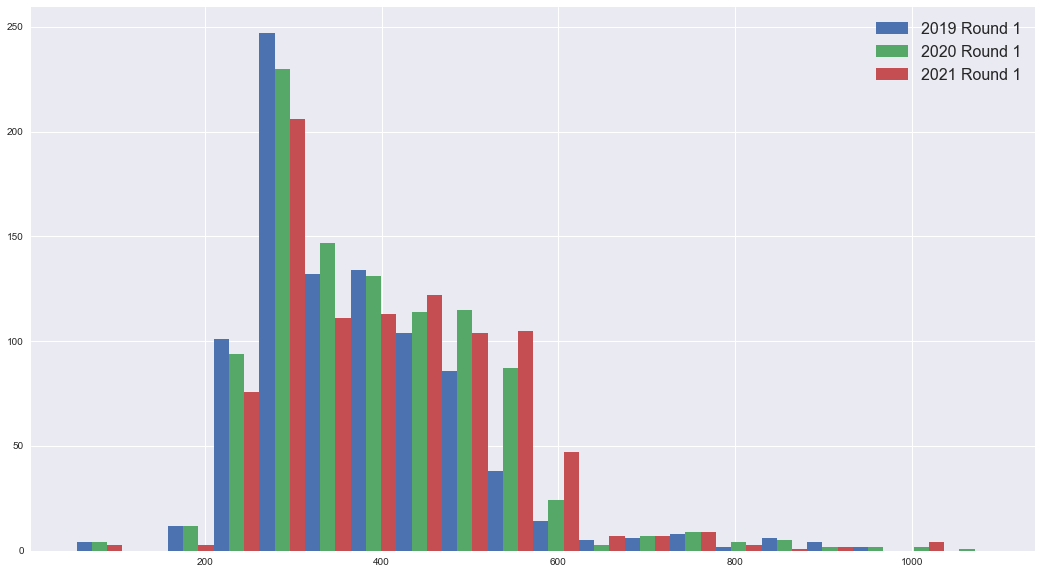

In [58]:
# Plot the data for the three year's round 1 points for comparison in side by side bar chart.
plt.hist(x, label = ('2019 Round 1', '2020 Round 1', '2021 Round 1'), rwidth=1)
plt.legend(loc='upper right', fontsize=16)
plt.show()

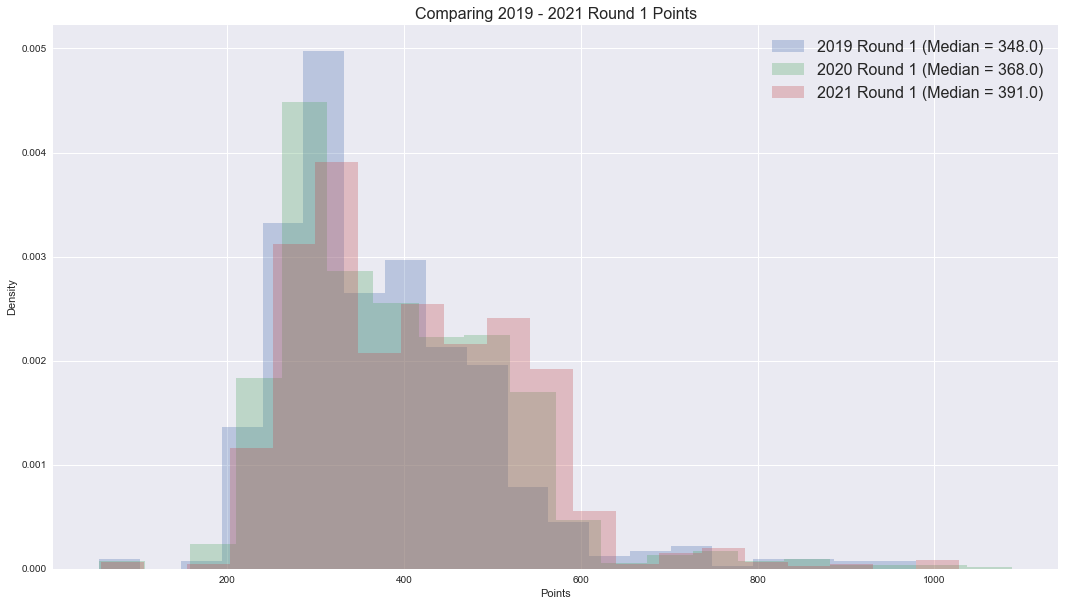

In [59]:
# Create overlapping histogram plot using the data for each year's round 1 points.
plt.hist(r1_2019, label = f'2019 Round 1 (Median = {med_2019})',
         alpha = 0.3, density=True)
plt.hist(r1_2020, label = f'2020 Round 1 (Median = {med_2020})',
         alpha = 0.3, density=True)
plt.hist(r1_2021, label = f'2021 Round 1 (Median = {med_2021})',
         alpha = 0.3, density=True)
# Add plot labels and legend.
plt.title('Comparing 2019 - 2021 Round 1 Points', fontsize=16)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize=16)
plt.show()

In [60]:
# Create an array for each year's round 2 points.
r2_2019 = df_merge['Points2_2019'].to_numpy()
r2_2020 = df_merge['Points2_2020'].to_numpy()
r2_2021 = df_merge['Points2_2021'].to_numpy()

# Calculate the median value for each year's round 2 points.
med2_2019 = df_merge['Points2_2019'].median()
med2_2020 = df_merge['Points2_2020'].median()
med2_2021 = df_merge['Points2_2021'].median()

In [61]:
# Stack all numpy arrays and transpose
y = np.vstack([r2_2019, r2_2020, r2_2021]).T

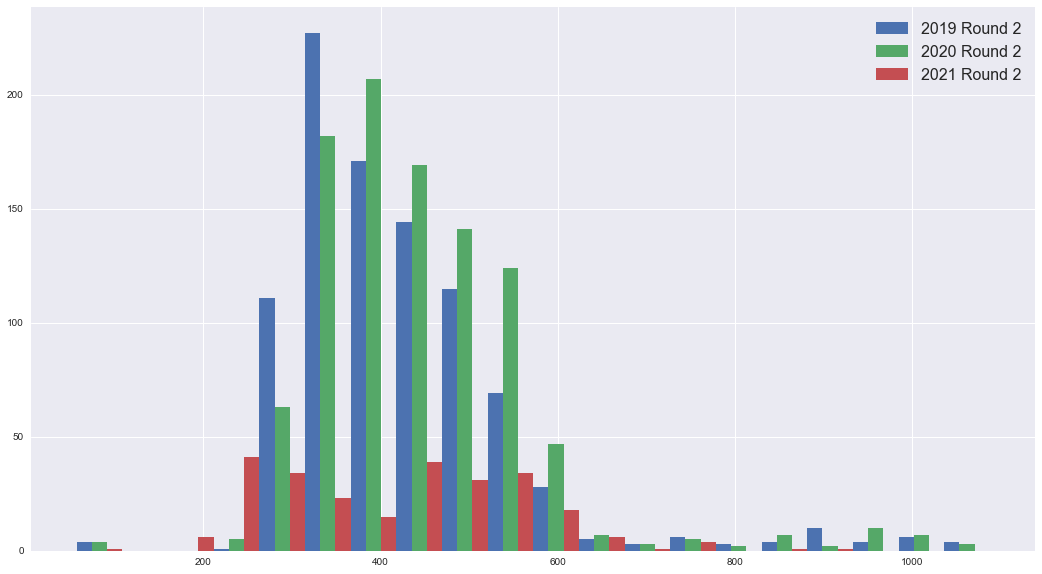

In [62]:
# Plot the data for the three year's round 2 points for comparison.
plt.hist(y, label = ('2019 Round 2', '2020 Round 2', '2021 Round 2'), rwidth=1)
plt.legend(loc='upper right', fontsize=16)
plt.show()

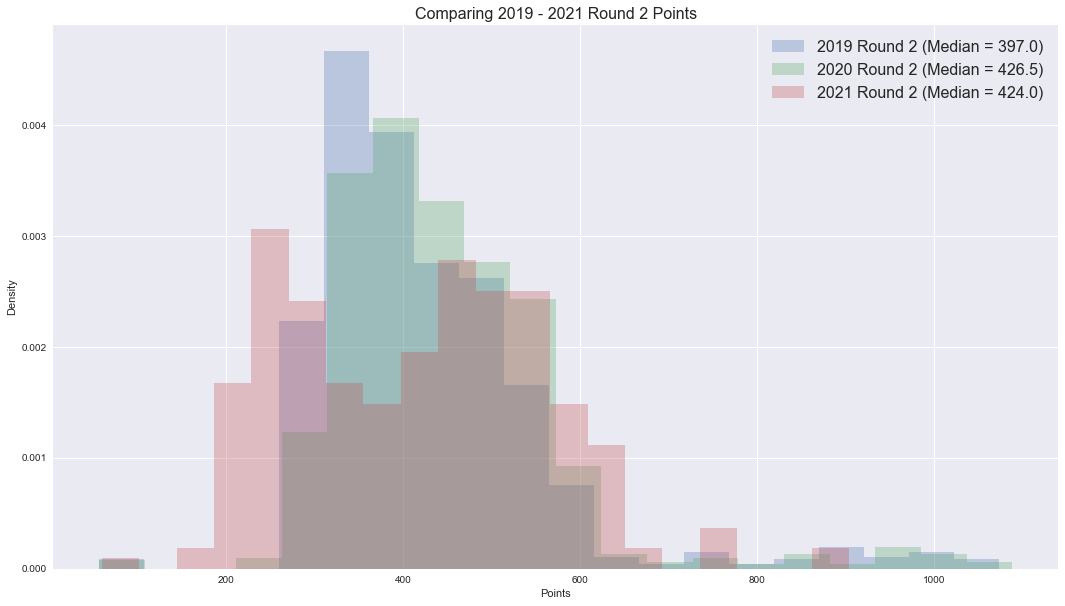

In [63]:
# Create the over lapping hist plot using the data for each year's round 2 points.
plt.hist(r2_2019, label = f'2019 Round 2 (Median = {med2_2019})',
         alpha = 0.3, density=True)
plt.hist(r2_2020, label = f'2020 Round 2 (Median = {med2_2020})',
         alpha = 0.3, density=True)
plt.hist(r2_2021, label = f'2021 Round 2 (Median = {med2_2021})',
         alpha = 0.3, density=True)
# Add plot labels and legend.
plt.title('Comparing 2019 - 2021 Round 2 Points', fontsize=16)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize=16)
plt.show()

<br>

## Kernel Density Plots (KDE)

***

In [64]:
# Advanced plotting
import seaborn as sns
# Statistical package.
from scipy import stats
# Probability Scales for Matplotlib.
import probscale

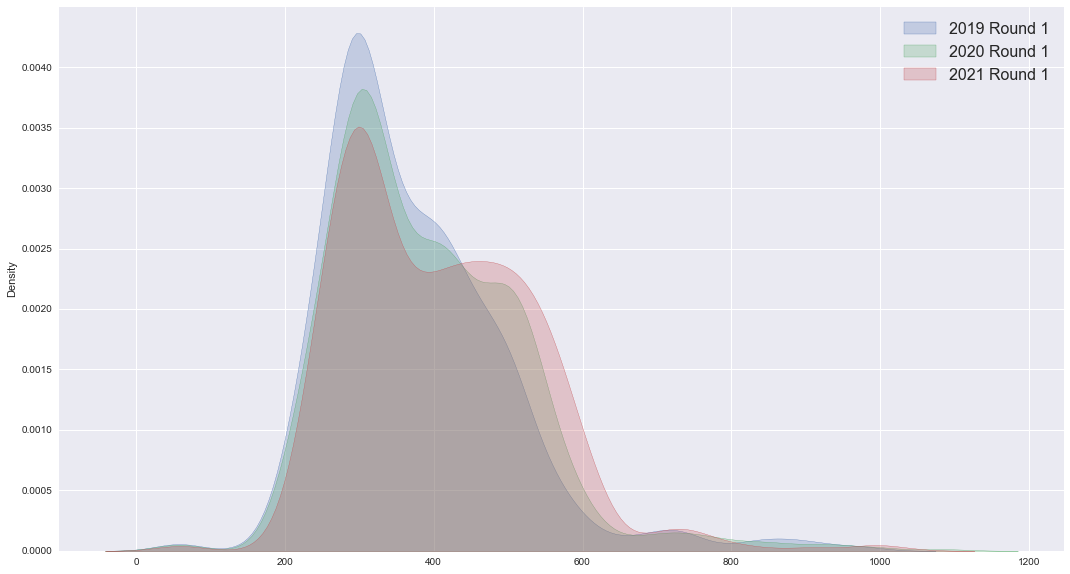

In [65]:
sns.kdeplot(data=r1_2019, fill = True, label = '2019 Round 1')
sns.kdeplot(data=r1_2020, fill = True, label = '2020 Round 1')
sns.kdeplot(data=r1_2021, fill = True, label = '2021 Round 1')

plt.legend(loc='upper right', fontsize=16)
plt.show()

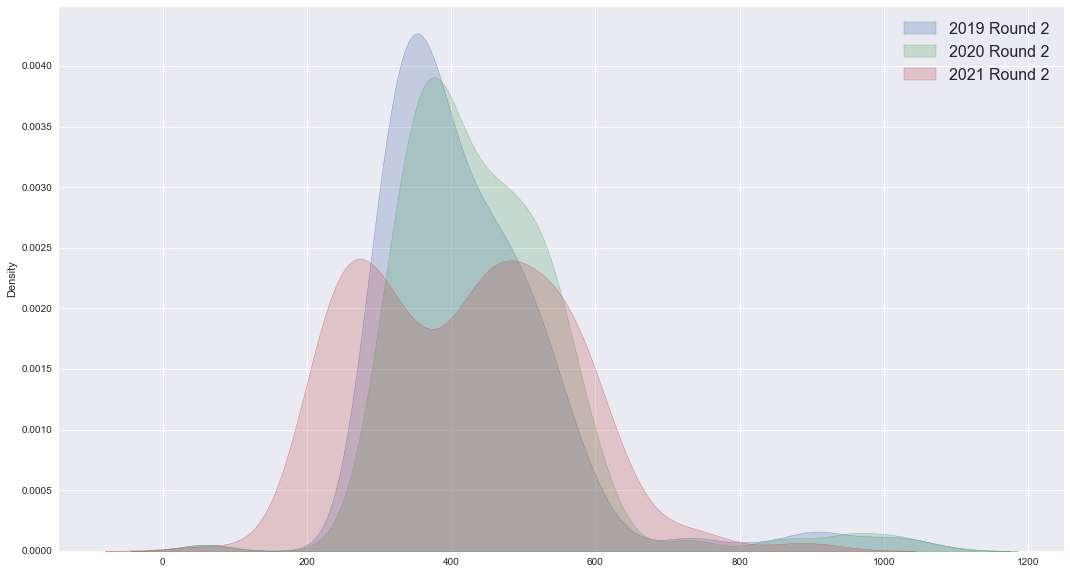

In [66]:
sns.kdeplot(data=r2_2019, fill = True, label = '2019 Round 2')
sns.kdeplot(data=r2_2020, fill = True, label = '2020 Round 2')
sns.kdeplot(data=r2_2021, fill = True, label = '2021 Round 2')

plt.legend(loc='upper right', fontsize=16)
plt.show()

<br>

### Evaluating skewness and Kurtosis

When we have a data set which approximates the normal distribution the mean, median and mode of the data will all be relatively close to each other. This is what generates the classic "bell-curve". When we see the mean, median and mode become increasingly unequal we can infer that we might have skewness in our data:

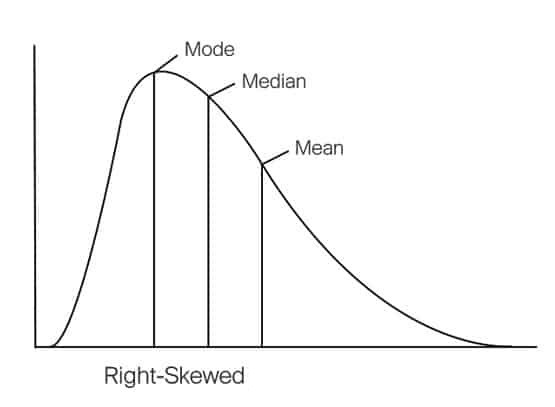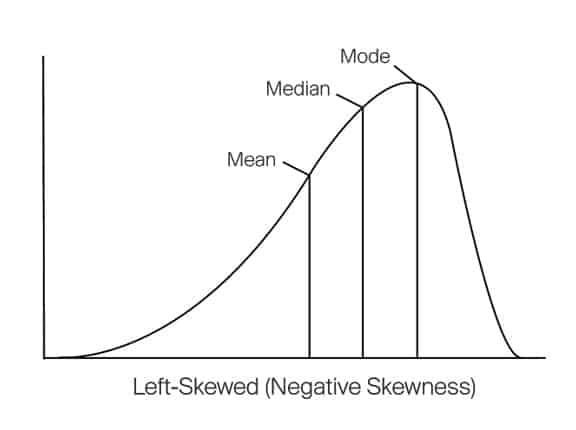
[reference](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37)


Kurtosis on the other hand measures the tailedness of the data. There are three types of kurtosis:

- Mesokurtic kurtosisis when the tailedness of the distribution is similar to the normal distribution.
- Leptokurtic kurtosis results when a distribution has a lot of data in the tails.
- Platykurtic kurtosis results when there is very little data in the tails of the distribution.

[Reference](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kurtosis-leptokurtic-platykurtic/)



***

When we review the skew values for each of the year's round 1 and round 2 points we see quite a bit of positive skew. Typically, if we were dealing with a normal distribution we would expect the skew value to be around 0.0

***

In [67]:
print('The skewness of each column is as follows: ')
print(df_merge.skew(axis=0, numeric_only=True))

The skewness of each column is as follows: 
Points1_2019    1.459909
Points2_2019    2.022493
Points1_2020    1.223431
Points2_2020    1.845680
Points1_2021    0.878840
Points2_2021    0.325224
dtype: float64


***

When we review the kurtosis values for each of the year's round 1 and round 2 points we have two distinct categories of kurtosis. In 2019 and 2020 both the round one points and round 2 points exhibit high values for kurtosis indicating that they are Leptokurtic (A lot of data in the tails). In 2021, the round one and round 2 points exhibit less kurtosis than the previous years however, rather than saying this was due to the data approximating the normal distribution I would be more inclined to think this is due to the bimodal characteristics that the data set exhibits.

***

In [68]:
print('The kurtosis of each column is as follows: ')
print(df_merge.kurtosis(axis=0, numeric_only=True))

The kurtosis of each column is as follows: 
Points1_2019    3.723962
Points2_2019    6.228088
Points1_2020    3.043115
Points2_2020    6.085258
Points1_2021    1.656960
Points2_2021   -0.222206
dtype: float64


<br>

***

### Evaluating Quantile-Quantile Plots for Our Data

A Quantitle- Quantile (QQ) plot can be used to help us to identify various distributions. For our purpose we will be using the QQ plots to determine if the data for each year's round 1 and round 2 points are representative of the normal distribution.

When data are normally distributed and a QQ plot is created, the data will appear as a straight, line (approximately). When the data is right skewed, the QQ plot will show a concave line, while left skewed data will be convex when plotted on the QQ plot.

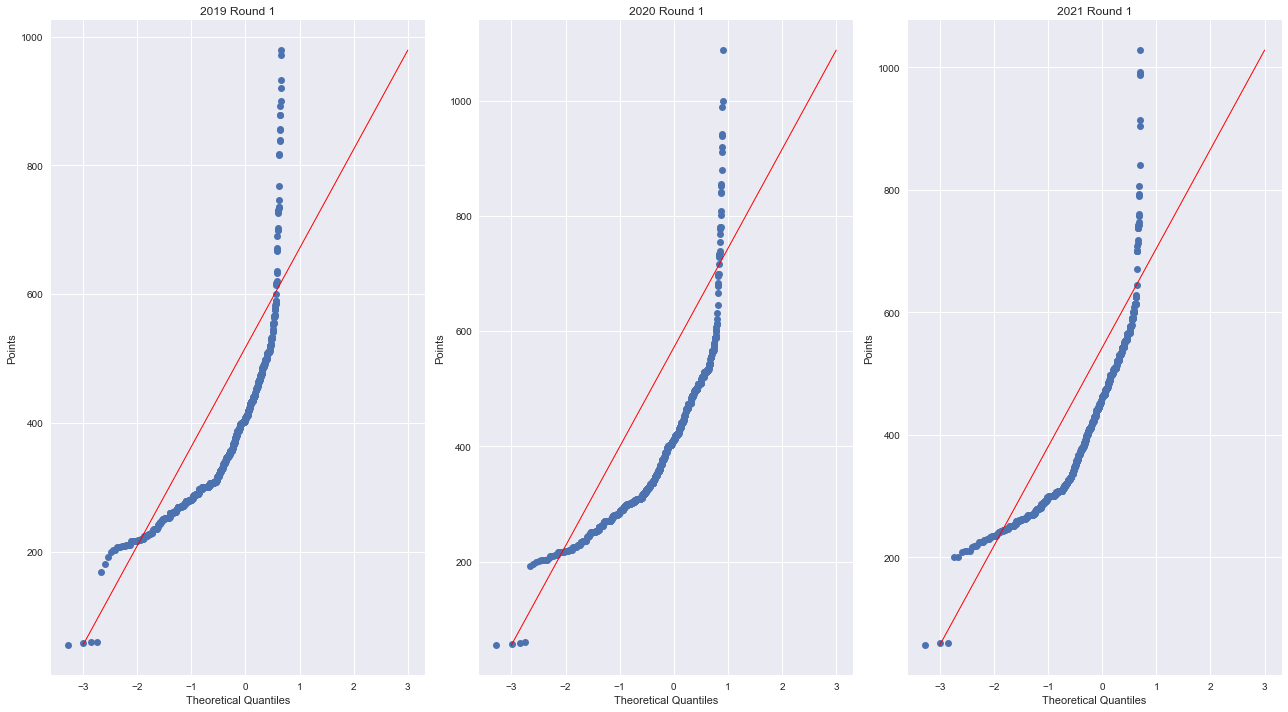

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True)

ax1.title.set_text('2019 Round 1')

probscale.probplot(r1_2019, ax=ax1, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
ax1.plot([-3, 3], [55, 979], 'red', linewidth=1)
ax2.title.set_text('2020 Round 1')
probscale.probplot(r1_2020, ax=ax2, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
ax2.plot([-3, 3], [55, 1088], 'red', linewidth=1)
ax3.title.set_text('2021 Round 1')
probscale.probplot(r1_2021, ax=ax3, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
ax3.plot([-3, 3], [57, 1028], 'red', linewidth=1)


fig.tight_layout()
sns.despine()
plt.show()

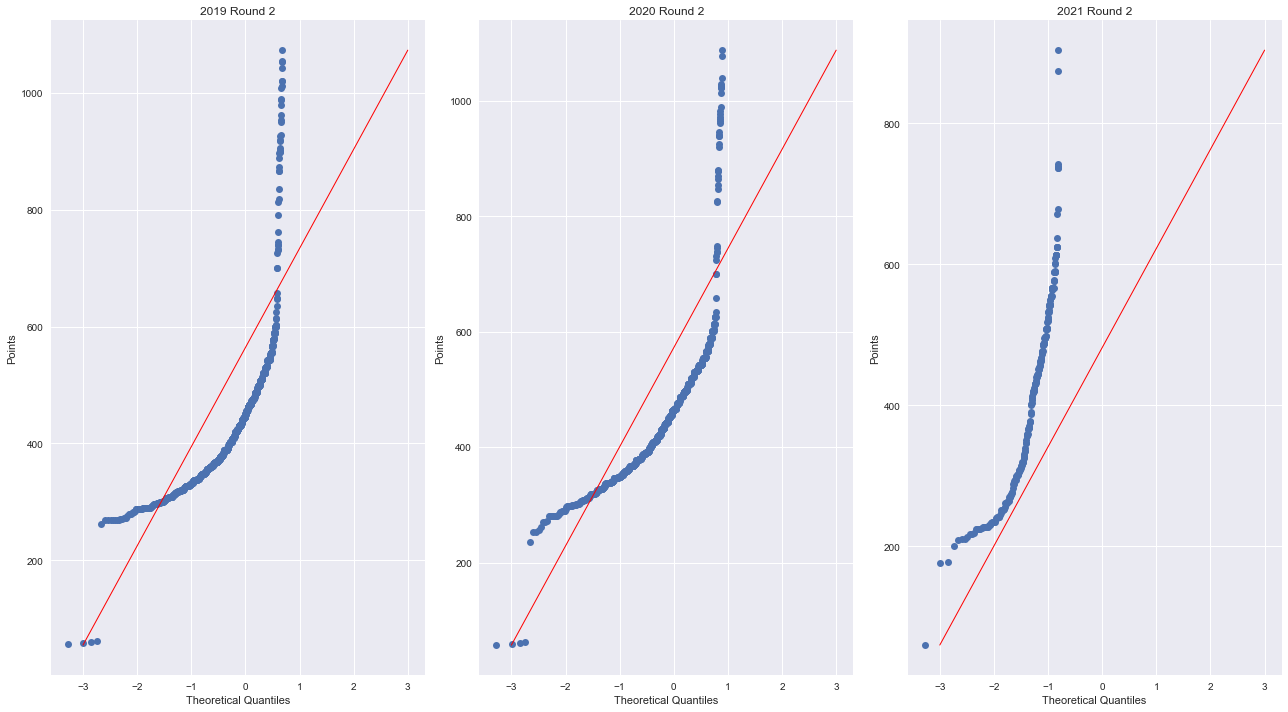

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True)

ax1.title.set_text('2019 Round 2')

probscale.probplot(r2_2019, ax=ax1, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
ax1.plot([-3, 3], [55, 1073], 'red', linewidth=1)
ax2.title.set_text('2020 Round 2')
probscale.probplot(r2_2020, ax=ax2, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
ax2.plot([-3, 3], [57, 1088], 'red', linewidth=1)
ax3.title.set_text('2021 Round 2')
probscale.probplot(r2_2021, ax=ax3, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
ax3.plot([-3, 3], [60, 904], 'red', linewidth=1)


fig.tight_layout()
sns.despine()
plt.show()

In [71]:
df_merge

,Code,Title,Points1_2019,Points2_2019,Points1_2020,Points2_2020,Points1_2021,Points2_2021
0,AC120,International Business,234.0,269.0,209.0,280.0,294.0,294.0
1,AC137,Liberal Arts ...,252.0,275.0,252.0,270.0,271.0,270.0
2,AD101,First Year Art & Design (Common Entry),NaN,550.0,NaN,NaN,554.0,NaN
3,AD102,Graphic Design and Moving Image Design,NaN,635.0,NaN,NaN,538.0,NaN
4,AD103,Textile & Surface Design and Jewellery & Objects,NaN,545.0,NaN,NaN,505.0,NaN
...,...,...,...,...,...,...,...,...
1209,WD211,Creative Computing,275.0,322.0,271.0,318.0,270.0,NaN
1210,WD212,Recreation and Sport Management,274.0,311.0,270.0,349.0,262.0,NaN
1211,WD230,Mechanical and Manufacturing Engineering,273.0,348.0,253.0,369.0,230.0,230.0
1212,WD231,Early Childhood Care and Education ...,NaN,NaN,NaN,NaN,266.0,NaN


In [72]:
## https://towardsdatascience.com/wide-to-long-data-how-and-when-to-use-pandas-melt-stack-and-wide-to-long-7c1e0f462a98
df1 = df_merge.melt(id_vars=['Code', 'Title'], var_name='Round_Year', value_name='Points')


In [73]:
# Take a peak.
df1

,Code,Title,Round_Year,Points
0,AC120,International Business,Points1_2019,234.0
1,AC137,Liberal Arts ...,Points1_2019,252.0
2,AD101,First Year Art & Design (Common Entry),Points1_2019,NaN
3,AD102,Graphic Design and Moving Image Design,Points1_2019,NaN
4,AD103,Textile & Surface Design and Jewellery & Objects,Points1_2019,NaN
...,...,...,...,...
7279,WD211,Creative Computing,Points2_2021,NaN
7280,WD212,Recreation and Sport Management,Points2_2021,NaN
7281,WD230,Mechanical and Manufacturing Engineering,Points2_2021,230.0
7282,WD231,Early Childhood Care and Education ...,Points2_2021,NaN


In [74]:
# Create a new dataframe only with round 1 points included.
points1 = df1[df1['Round_Year'].isin(['Points1_2019', 'Points1_2020', 'Points1_2021'])]

# Create a new dataframe only with round 2 points included.
points2 = df1[df1['Round_Year'].isin(['Points2_2019', 'Points2_2020', 'Points2_2021'])]

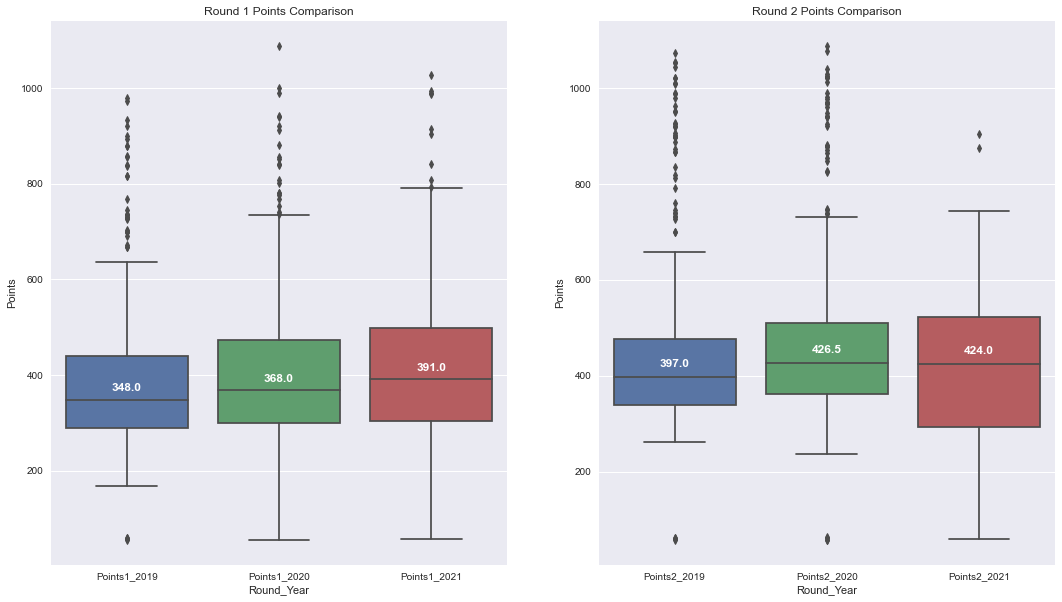

In [75]:
# https://stackoverflow.com/questions/45475962/labeling-boxplot-with-median-values

fig, axes = plt.subplots(1, 2)

ax1 = sns.boxplot(x =points1['Round_Year'], y=points1['Points'], ax=axes[0])
ax1.set_title('Round 1 Points Comparison')
medians = points1.groupby(['Round_Year'])['Points'].median()
vertical_offset = points1['Points'].median() * 0.05 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='w',weight='bold')
    
ax2 = sns.boxplot(x =points2['Round_Year'], y=points2['Points'], ax=axes[1])
ax2.set_title('Round 2 Points Comparison')
medians = points2.groupby(['Round_Year'])['Points'].median()
vertical_offset = points2['Points'].median() * 0.05 # offset from median for display

for xtick in ax2.get_xticks():
    ax2.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='w',weight='bold')

In [76]:
# Cretae Summary Table.
df1.groupby(['Round_Year']).describe()


Points                                                           
              count        mean         std   min    25%    50%    75%     max
Round_Year                                                                    
Points1_2019  905.0  374.893923  123.959108  55.0  290.0  348.0  440.0   979.0
Points1_2020  993.0  391.799597  128.446837  55.0  300.0  368.0  474.0  1088.0
Points1_2021  923.0  407.666306  128.706224  57.0  303.0  391.0  499.0  1028.0
Points2_2019  915.0  426.414208  133.142255  57.0  339.0  397.0  477.5  1073.0
Points2_2020  988.0  448.198381  129.237735  57.0  362.0  426.5  510.0  1088.0
Points2_2021  255.0  414.749020  141.693386  60.0  293.5  424.0  521.5   904.0

In [77]:
r1_2019 = np.asarray([points1[points1['Round_Year'] == 'Points1_2019']["Points"].values])
r1_2020 = np.asarray([points1[points1['Round_Year'] == 'Points1_2020']["Points"].values])
r1_2021 = np.asarray([points1[points1['Round_Year'] == 'Points1_2021']["Points"].values])

In [78]:
points1.dtypes


Code           object
Title          object
Round_Year     object
Points        float64
dtype: object

In [79]:
r1_2019 = df_merge['Points1_2019']
r1_2020 = df_merge['Points1_2020']
r1_2021 = df_merge['Points1_2021']

r2_2019 = df_merge['Points2_2019']
r2_2020 = df_merge['Points2_2020']
r2_2021 = df_merge['Points2_2021']

In [80]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
stats.kruskal(r1_2019, r1_2020, r1_2021, nan_policy = 'omit')

KruskalResult(statistic=38.879872365910444, pvalue=3.608635250778132e-09)

In [81]:
stat, p = stats.kruskal(r1_2019, r1_2020, r1_2021, nan_policy = 'omit')
print(f'Statistics = {stat}, p-value = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics = 38.879872365910444, p-value = 3.608635250778132e-09
Different distribution (reject H0)


In [82]:
df_r1 = df_merge.drop(columns=['Points2_2019', 'Points2_2020', 'Points2_2021'])

In [83]:
df_r1

,Code,Title,Points1_2019,Points1_2020,Points1_2021
0,AC120,International Business,234.0,209.0,294.0
1,AC137,Liberal Arts ...,252.0,252.0,271.0
2,AD101,First Year Art & Design (Common Entry),NaN,NaN,554.0
3,AD102,Graphic Design and Moving Image Design,NaN,NaN,538.0
4,AD103,Textile & Surface Design and Jewellery & Objects,NaN,NaN,505.0
...,...,...,...,...,...
1209,WD211,Creative Computing,275.0,271.0,270.0
1210,WD212,Recreation and Sport Management,274.0,270.0,262.0
1211,WD230,Mechanical and Manufacturing Engineering,273.0,253.0,230.0
1212,WD231,Early Childhood Care and Education ...,NaN,NaN,266.0


In [84]:
# Calculate the difference across years for Round 1 Points
df_r1['Diff_19_20'] = df_r1['Points1_2020'] - df_r1['Points1_2019']
df_r1['Diff_20_21'] = df_r1['Points1_2021'] - df_r1['Points1_2020']
df_r1['Diff_19_21'] = df_r1['Points1_2021'] - df_r1['Points1_2019']



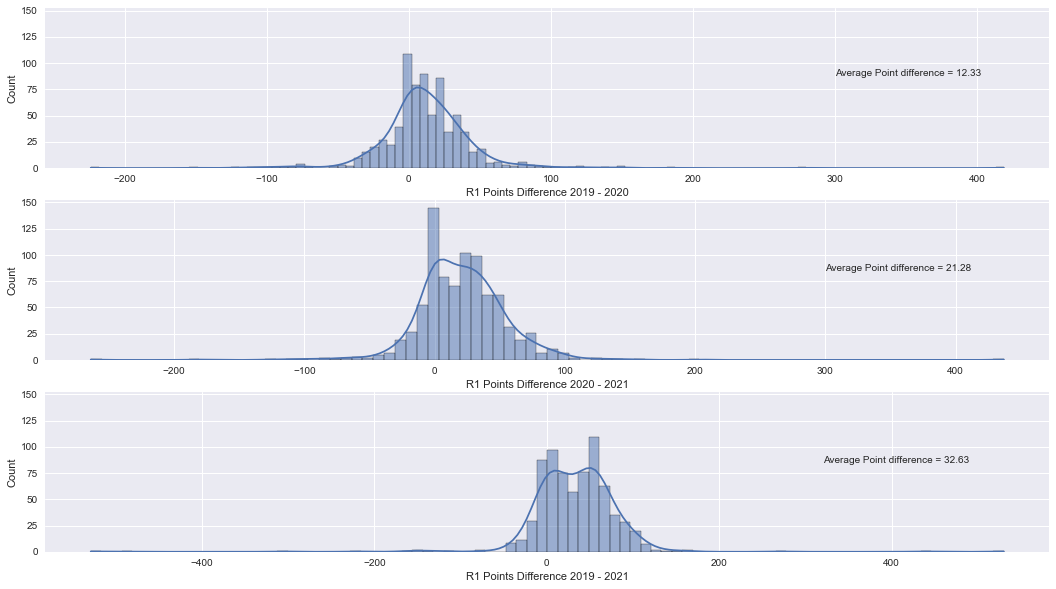

In [85]:
fig, axes = plt.subplots(3, 1, sharey=True)

ax1 = sns.histplot(data=df_r1['Diff_19_20'], fill = True, label = 'Points Difference 2019 - 2020', ax=axes[0], kde=True)
ax1.set(xlabel='R1 Points Difference 2019 - 2020')
ax1.text(300, 88, f"Average Point difference = {round(df_r1['Diff_19_20'].mean(),2)}")
ax2 = sns.histplot(data=df_r1['Diff_20_21'], fill = True, label = 'Points Difference 2020 - 2021', ax=axes[1], kde=True)
ax2.text(300, 85, f"Average Point difference = {round(df_r1['Diff_20_21'].mean(),2)}")
ax2.set(xlabel='R1 Points Difference 2020 - 2021')
ax3 = sns.histplot(data=df_r1['Diff_19_21'], fill = True, label = 'Points Difference 2019 - 2021', ax=axes[2], kde=True)
ax3.text(320, 85, f"Average Point difference = {round(df_r1['Diff_19_21'].mean(),2)}")
ax3.set(xlabel='R1 Points Difference 2019 - 2021')

plt.show()

In [86]:
# Select relevant data and Drop any rows with NaN in Diff_19_20
df_r1_2020 = df_r1[['Code', 'Title', 'Diff_19_20']].dropna().sort_values(
    by='Diff_19_20', ascending=False)



In [87]:
# Create new dataframe - 25 courses with highest R1 point difference & 
# 25 courses with lowest R1 point difference
hi_lo_2020 = pd.concat([df_r1_2020.head(25), df_r1_2020.tail(25)])

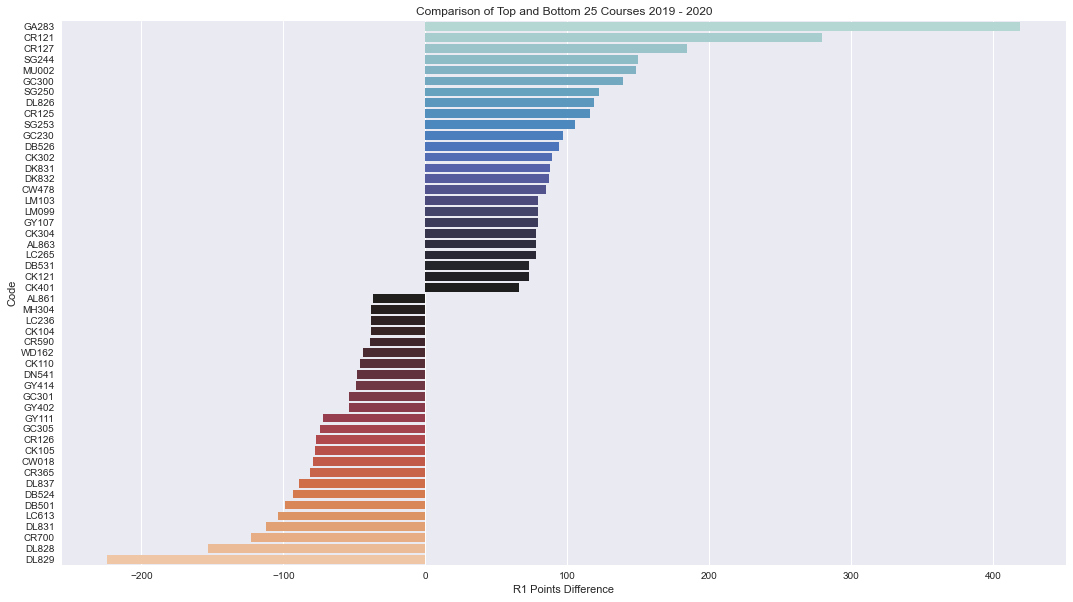

In [88]:
fig, axes = plt.subplots()

ax1 = sns.barplot(x="Diff_19_20", y="Code", data=hi_lo_2020, palette='icefire')
ax1.set_title('Comparison of Top and Bottom 25 Courses 2019 - 2020')
ax1.set(xlabel='R1 Points Difference')
#plt.title('
plt.show()



In [89]:
# View data Frame of top and bottom 25 (2019 - 2020)
hi_lo_2020

,Code,Title,Diff_19_20
502,GA283,Contemporary Art,419.0
154,CR121,Music at CIT Cork School of Music,279.0
157,CR127,Popular Music: Electric Guitar at CIT Cork Sch...,184.0
846,SG244,Fine Art ...,150.0
815,MU002,Theology,148.0
550,GC300,Business ...,139.0
852,SG250,Application Design and User Experience,122.0
363,DL826,Visual Communication Design,119.0
155,CR125,Popular Music: Electric Bass Guitar at CIT Cor...,116.0
855,SG253,Computing in Computer Networks and Cyber Secur...,105.0


In [90]:
# Select relevant data and Drop any rows with NaN in Diff_20_21
df_r1_2021 = df_r1[['Code', 'Title', 'Diff_20_21']].dropna().sort_values(
    by='Diff_20_21', ascending=False)


In [91]:
hi_lo_2021 = pd.concat([df_r1_2021.head(25), df_r1_2021.tail(25)])

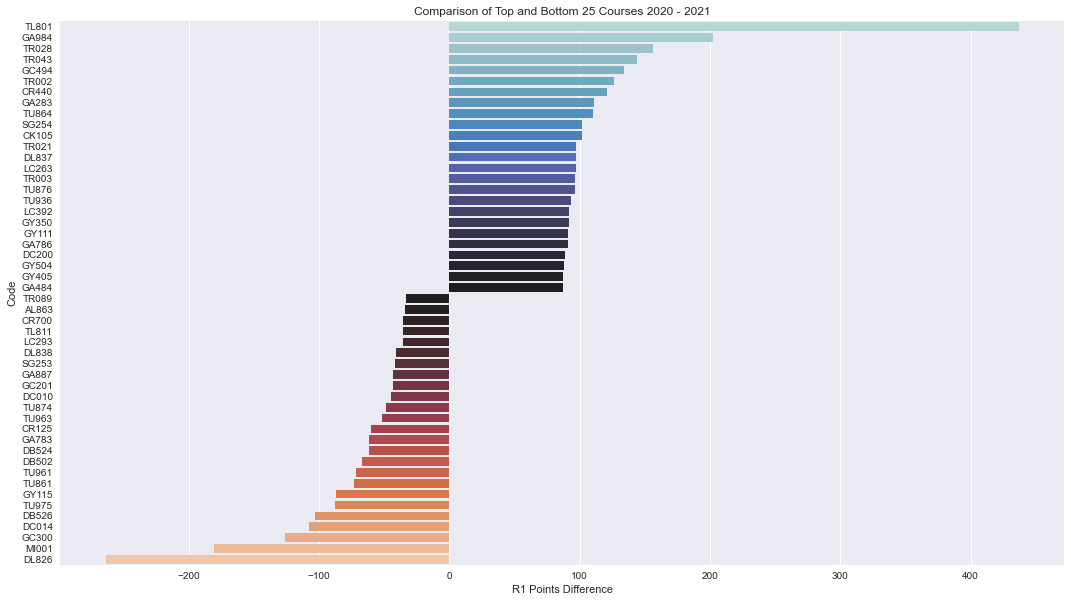

In [92]:
fig, axes = plt.subplots()

ax1 = sns.barplot(x="Diff_20_21", y="Code", data=hi_lo_2021, palette='icefire')
ax1.set_title('Comparison of Top and Bottom 25 Courses 2020 - 2021')
ax1.set(xlabel='R1 Points Difference')
#plt.title('
plt.show()

In [93]:
hi_lo_2021

,Code,Title,Diff_20_21
901,TL801,Animation Visual Effects and Motion Design,437.0
545,GA984,Furniture Design Making and Technology - Comm...,202.0
946,TR028,Ancient and Medieval History and Culture,156.0
958,TR043,History of Art and Architecture,144.0
565,GC494,Fashion Design (Dublin),134.0
927,TR002,Music,126.0
180,CR440,Montessori Education ...,121.0
502,GA283,Contemporary Art,111.0
1091,TU864,DNA and Forensic Analysis ...,110.0
856,SG254,Writing and Literature Online ...,102.0


In [94]:
# Select relevant data and Drop any rows with NaN in Diff_19_21
df_r1_2022 = df_r1[['Code', 'Title', 'Diff_19_21']].dropna().sort_values(
    by='Diff_19_21', ascending=False)

In [95]:
hi_lo_2022 = pd.concat([df_r1_2022.head(25), df_r1_2022.tail(25)])

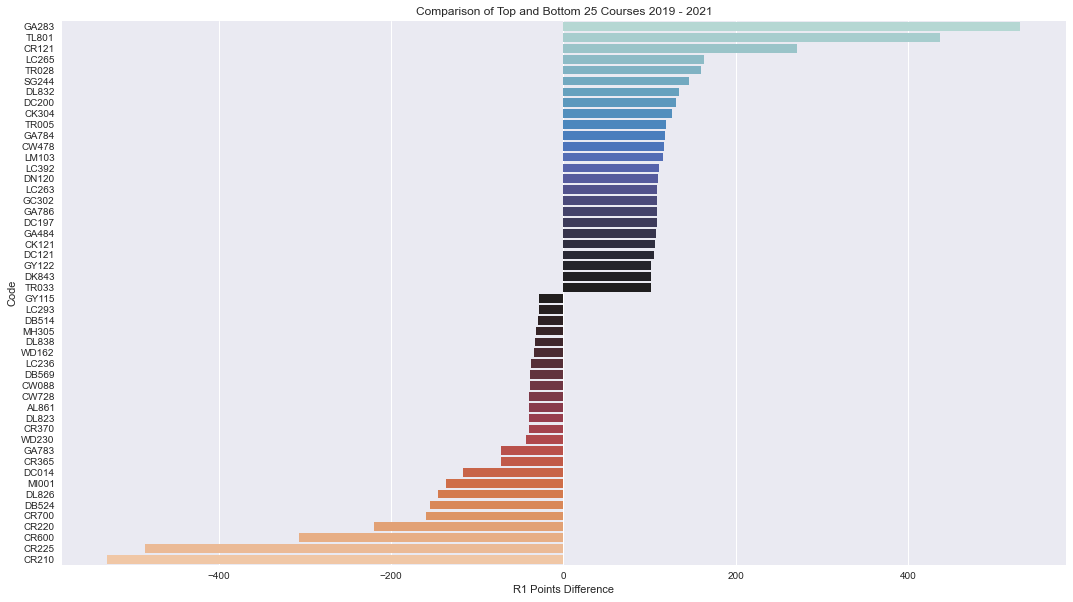

In [96]:
fig, axes = plt.subplots()

ax1 = sns.barplot(x="Diff_19_21", y="Code", data=hi_lo_2022, palette='icefire')
ax1.set_title('Comparison of Top and Bottom 25 Courses 2019 - 2021')
ax1.set(xlabel='R1 Points Difference')
#plt.title('
plt.show()

In [97]:
hi_lo_2022

,Code,Title,Diff_19_21
502,GA283,Contemporary Art,530.0
901,TL801,Animation Visual Effects and Motion Design,437.0
154,CR121,Music at CIT Cork School of Music,271.0
660,LC265,Forensic and Pharmaceutical Sciences,163.0
946,TR028,Ancient and Medieval History and Culture,159.0
846,SG244,Fine Art ...,146.0
369,DL832,Animation,134.0
300,DC200,Common Entry into Engineering (Undenominated E...,130.0
110,CK304,Law and Irish,126.0
930,TR005,Philosophy,119.0


## References

[1:Real-Python_REGEX](https://realpython.com/python-web-scraping-practical-introduction/)

[2:StackOverFlow-Iter_lines](https://stackoverflow.com/questions/16870648/python-read-website-data-line-by-line-when-available)

[3:REGEX_Syntax](https://docs.python.org/3/library/re.html)

[4:StackOverFlow-utf-8](https://stackoverflow.com/questions/13110629/decoding-utf-8-strings-in-python)

[5:Understanding_ISO-8859-1](https://mincong.io/2019/04/07/understanding-iso-8859-1-and-utf-8/)
